In [1]:
!git clone https://github.com/ssanderson/pydata-toolbox.git

Cloning into 'pydata-toolbox'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 61 (delta 2), reused 0 (delta 0), pack-reused 55
Unpacking objects: 100% (61/61), done.


In [2]:
pip install -U fortran-magic

In [3]:
%reload_ext fortranmagic

/usr/local/lib/python3.6/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [4]:
import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# About Me:

*   Senior Engineer at Quantopian
*   Background in Mathematics and Philosophy
*   Twitter: @scottbsanderson
*   GitHub: ssanderson

# Outline
*   Built-in Data Structures
*   Numpy array
*   Pandas Series/DataFrame
*   Plotting and "Real-World" Analyses


# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [5]:
assert ran_the_first_cell, "Oh noes!"

In [7]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [8]:
#Modification
p = [2323, 'derp', 7.0, 3.14]
p

[2323, 'derp', 7.0, 3.14]

In [28]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: 2


In [29]:
#Modification
third = p[2]
fourth = p[3]
print ('third:', third)
print ('fourth:', fourth)

third: 6
fourth: 8


In [11]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [30]:
#Modification
firstp = p[-4]
lastp = p[-1]
print ('first:', firstp)
print ('last:', lastp) 

first: 6
last: twelve


In [13]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [32]:
#Modification
sublistp = p[0:2]
sublistp

[2, 4]

In [15]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [36]:
#Modification
first_fourp = p[:4]
first_fourp

[2, 4, 6, 8]

In [17]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [37]:
#Modification
after_twop = p[2:]
after_twop

[6, 8, 10, 'twelve']

In [19]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [41]:
#Modification
p = [12, 23, 34, 45, 56, 67, 78, 98, 1010101]
p[0:8:3]

[12, 45, 78]

In [39]:
# This is a cute way to reverse a list.
l[::-1]

['six', 5, 4, 3, 2, 1]

In [42]:
#Modification
p[::-1]

[1010101, 98, 78, 67, 56, 45, 34, 23, 12]

In [24]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [43]:
#Modification
p = [2,4,6,8,10]
print ('Before:', p)
p.append('twelve')
print ('After:', p)

Before: [2, 4, 6, 8, 10]
After: [2, 4, 6, 8, 10, 'twelve']


In [44]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

In [45]:
#Modification
[x*3 for x in p]

[6, 12, 18, 24, 30, 'twelvetwelvetwelve']

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [46]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [47]:
#Modification
scientists = {'Michael': 'Faraday', 'Isaac': 'Newton', 'Albert':'Einstein' }
scientists

{'Albert': 'Einstein', 'Isaac': 'Newton', 'Michael': 'Faraday'}

In [48]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [49]:
#Modification
scientists ['Charles'] = 'Darwin'
scientists

{'Albert': 'Einstein',
 'Charles': 'Darwin',
 'Isaac': 'Newton',
 'Michael': 'Faraday'}

In [50]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [51]:
#Modification
del scientists ['Charles']
scientists

{'Albert': 'Einstein', 'Isaac': 'Newton', 'Michael': 'Faraday'}

In [52]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

In [54]:
#Modification
scientists['Albert':'Isaac']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

In [55]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [56]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

In [57]:
%%time

matmul(a, b)

CPU times: user 57 µs, sys: 11 µs, total: 68 µs
Wall time: 72.5 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

In [58]:
#Modification
c = [[0,1,0,1],
    [2,1,2,2],
    [3,4,3,5],
    [8,5,2,4]]
d = [[0,1,0,1],
    [2,1,2,2],
    [3,4,3,5],
    [8,5,2,4]]

In [59]:
%%time

matmul(c, d)

CPU times: user 29 µs, sys: 0 ns, total: 29 µs
Wall time: 30.8 µs


[[10, 6, 4, 6], [24, 21, 12, 22], [57, 44, 27, 46], [48, 41, 24, 44]]

In [60]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for x in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.9340534290421887, 0.6120309688902785, 0.25390847116960247],
 [0.5245562602693302, 0.9326391822161465, 0.7240545983493302]]

In [61]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 5.65 s, sys: 19.5 ms, total: 5.67 s
Wall time: 5.68 s


In [62]:
#Modification
%%time
randc = random_matrix(600, 100)
randd = random_matrix(100, 600)
x = matmul(randc, randd)

CPU times: user 5.9 s, sys: 12.8 ms, total: 5.92 s
Wall time: 5.92 s


In [63]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [64]:
pip install -U fortran-magic

Requirement already up-to-date: fortran-magic in /usr/local/lib/python3.6/dist-packages (0.7)


In [65]:
%reload_ext fortranmagic

/usr/local/lib/python3.6/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [66]:
%%fortran
  subroutine fortran_dot_product (xs, ys, result)
      double precision, intent(in) :: xs(:)
      double precision, intent(in) :: ys(:)
      double precision, intent(out) :: result
      
      result = sum(xs * ys)
  end

In [67]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [68]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 8.68 ms, sys: 17 µs, total: 8.69 ms
Wall time: 8.65 ms


333328333350000.0

In [69]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 170 µs, sys: 8 µs, total: 178 µs
Wall time: 180 µs


333328333350000.0

## Why is the Python Version so Much Slower?

In [70]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [73]:
#Modification
mul_elemwise([1, 3, 4, 5], ['hi', 3, 0.1, '3 + j'])

['hi', 9, 0.4, '3 + j3 + j3 + j3 + j3 + j']

In [76]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


In [77]:
#Modification
source_code = 'a + b * c + d'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 LOAD_NAME                3 (d)
             12 BINARY_ADD
             14 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [78]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [79]:
data + data

array([2, 4, 6, 8])

In [80]:
#Modification
dat = np.array([2,4,6,8,10,11])
dat

array([ 2,  4,  6,  8, 10, 11])

In [81]:
#Modification
dat + dat + dat

array([ 6, 12, 18, 24, 30, 33])

In [82]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 1.27 ms, sys: 0 ns, total: 1.27 ms
Wall time: 4.95 ms


333328333350000.0

In [83]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 1.29 ms, sys: 7 ms, total: 8.29 ms
Wall time: 7.9 ms


333328333350000.0

In [84]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 204 µs, sys: 0 ns, total: 204 µs
Wall time: 211 µs


333328333350000.0

In [85]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [87]:
#Modification
dat[0]= 'foobar'

ValueError: ignored

In [88]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: ignored

In [89]:
#Modification
dat.append(12)

AttributeError: ignored

In [90]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

In [91]:
#Modification
two_by_three = dat.reshape(3,2)
two_by_three

array([[ 2,  4],
       [ 6,  8],
       [10, 11]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [92]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


In [93]:
#Modification
arr2 = np.array([4, 5, 6, 8, 9, 1], dtype='int16').reshape(2, 3)
print("Array:\n", arr2, sep='')
print("===========")
print("DType:", arr2.dtype)
print("Shape:", arr2.shape)
print("Strides:", arr2.strides)
print("Data:", arr2.data.tobytes())

Array:
[[4 5 6]
 [8 9 1]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x04\x00\x05\x00\x06\x00\x08\x00\t\x00\x01\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [94]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [95]:
#Modification
data2 = np.arange(25).reshape(5, 5)
data2

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [96]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [97]:
#Modification
data2 *data2*data2

array([[    0,     1,     8,    27,    64],
       [  125,   216,   343,   512,   729],
       [ 1000,  1331,  1728,  2197,  2744],
       [ 3375,  4096,  4913,  5832,  6859],
       [ 8000,  9261, 10648, 12167, 13824]])

In [98]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [99]:
#Modification
np.sqrt(data2)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739],
       [3.87298335, 4.        , 4.12310563, 4.24264069, 4.35889894],
       [4.47213595, 4.58257569, 4.69041576, 4.79583152, 4.89897949]])

In [100]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [101]:
#Modification
(data2%4)==0 

array([[ True, False, False, False,  True],
       [False, False, False,  True, False],
       [False, False,  True, False, False],
       [False,  True, False, False, False],
       [ True, False, False, False,  True]])

In [102]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [108]:
#Modification
(((data2%2)==0)|((data2%3)==0))

array([[ True, False,  True,  True,  True],
       [False,  True, False,  True,  True],
       [ True, False,  True, False,  True],
       [ True,  True, False,  True, False],
       [ True,  True,  True, False,  True]])

In [104]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [105]:
#Modification
data2@data2.T

array([[  30,   80,  130,  180,  230],
       [  80,  255,  430,  605,  780],
       [ 130,  430,  730, 1030, 1330],
       [ 180,  605, 1030, 1455, 1880],
       [ 230,  780, 1330, 1880, 2430]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [109]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [111]:
#Modification
sines2 = np.sin(np.linspace(0, 3.14, 10000))
cosines2 = np.cos(np.linspace(0, 3.14, 10000))
sines2

array([0.        , 0.00031403, 0.00062806, ..., 0.00222071, 0.00190668,
       0.00159265])

In [112]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [121]:
#Modification
sines2[30]

0.009420802736876645

In [116]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [119]:
#Modification
sines2[:30]

array([0.        , 0.00031403, 0.00062806, 0.00094209, 0.00125613,
       0.00157016, 0.00188419, 0.00219822, 0.00251225, 0.00282628,
       0.00314031, 0.00345434, 0.00376837, 0.0040824 , 0.00439643,
       0.00471045, 0.00502448, 0.00533851, 0.00565254, 0.00596656,
       0.00628059, 0.00659461, 0.00690864, 0.00722266, 0.00753668,
       0.0078507 , 0.00816473, 0.00847875, 0.00879277, 0.00910678])

In [122]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [124]:
#Modification
sines2[5000:]

array([0.9999998 , 0.99999995, 1.        , ..., 0.00222071, 0.00190668,
       0.00159265])

In [125]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [126]:
#Modification
sines2[::999]

array([0.        , 0.3085967 , 0.58707002, 0.80823707, 0.95050882,
       0.99999756, 0.95187249, 0.81083129, 0.59064157, 0.31279693,
       0.00441892])

In [127]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [128]:
#Modification
print("sines:\n", sines2)
print("sines > 0.5:\n", sines2 > 0.5)
print("sines[sines > 0.5]:\n", sines2[sines2 > 0.5])

sines:
 [0.         0.00031403 0.00062806 ... 0.00222071 0.00190668 0.00159265]
sines > 0.5:
 [False False False ... False False False]
sines[sines > 0.5]:
 [0.50017805 0.50044995 0.5007218  ... 0.50074128 0.50046943 0.50019753]


In [129]:
## We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [130]:
#Modification
print(sines2)
sines2[[99,777,1900]]

[0.         0.00031403 0.00062806 ... 0.00222071 0.00190668 0.00159265]


array([0.0310841 , 0.2415884 , 0.56188243])

In [131]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [132]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [133]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [134]:
#Modification
unsorted2= np.array([66,83,13,75,0])
print (unsorted2)
sort2 = np.argsort(unsorted2)
print (sort2)
print (unsorted2[sort2])

[66 83 13 75  0]
[4 2 0 3 1]
[ 0 13 66 75 83]


In [135]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [136]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [137]:
#Modification
market_caps2 = np.array([13,24,35,21,14])
assets2 = np.array(['N','F', 'J', 'M', 'T'])
sort_by_mcaps2 = np.argsort(market_caps2)
assets2[sort_by_mcaps2]

array(['N', 'T', 'M', 'F', 'J'], dtype='<U1')

In [138]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [139]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [140]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [141]:
#Modification
data3 = np.arange(36).reshape(6,6)
data3

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [142]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [143]:
#Modification
data3[:-2  , :-2] #every row and columm before the last two

array([[ 0,  1,  2,  3],
       [ 6,  7,  8,  9],
       [12, 13, 14, 15],
       [18, 19, 20, 21]])

In [144]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [145]:
#Modification
data3[ :3, [ 1,2]] #first three rows, second and third columms

array([[ 1,  2],
       [ 7,  8],
       [13, 14]])

In [147]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

In [149]:
#Modification
data3[(data3[:, 2]% 2 )==1] # rows where the third columm is not divisible by 2

array([], shape=(0, 6), dtype=int64)

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [150]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [151]:
variance(np.random.standard_normal(1000))

0.8693570952418291

In [152]:
#Modification
variance(np.random.standard_normal(155555555))

1.0001259842012742

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [153]:
data = np.arange(30)
data.mean()

14.5

In [154]:
#Modification
data3 = np.arange(101)
data3.mean()

50.0

- ...but we can do more interesting things with multi-dimensional arrays.

In [155]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [156]:
#Modification
data3 = np.arange(45).reshape(5,9)
data3

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44]])

In [157]:
data.mean()

14.5

In [158]:
#Modification
data3.mean()

22.0

In [159]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [160]:
#Modification
data3.mean(axis=0)

array([18., 19., 20., 21., 22., 23., 24., 25., 26.])

In [161]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

In [162]:
#Modification
data3.mean(axis=1)

array([ 4., 13., 22., 31., 40.])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [163]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [164]:
#Modification
row2 = row * 2
column2 = column*2
print("Row:\n", row2, sep='')
print("Column:\n", column2, sep='')

Row:
[2 4 6 8]
Column:
[[2]
 [4]
 [6]]


In [165]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

In [166]:
#Modification
row2 + column2

array([[ 4,  6,  8, 10],
       [ 6,  8, 10, 12],
       [ 8, 10, 12, 14]])

<center><img src="images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [167]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


In [168]:
#Modification
print("Data:\n", data3, sep='')
print("Mean:\n", data3.mean(axis=0), sep='')
print("Data - Mean:\n", data3 - data3.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16 17]
 [18 19 20 21 22 23 24 25 26]
 [27 28 29 30 31 32 33 34 35]
 [36 37 38 39 40 41 42 43 44]]
Mean:
[18. 19. 20. 21. 22. 23. 24. 25. 26.]
Data - Mean:
[[-18. -18. -18. -18. -18. -18. -18. -18. -18.]
 [ -9.  -9.  -9.  -9.  -9.  -9.  -9.  -9.  -9.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  9.   9.   9.   9.   9.   9.   9.   9.   9.]
 [ 18.  18.  18.  18.  18.  18.  18.  18.  18.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [169]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [170]:
#Modification
t = pd.Series(index = ['n', 'm', 'p', 'q'], data = [2,4,6,0])
t

n    2
m    4
p    6
q    0
dtype: int64

In [171]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [172]:
#Modification
print("The index is:", t.index)
print("The values are:", t.values)

The index is: Index(['n', 'm', 'p', 'q'], dtype='object')
The values are: [2 4 6 0]


In [173]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [174]:
#Modification
t.iloc[3]

0

In [175]:
# ... or by label.
s.loc['a']

1

In [176]:
#Modification
t.loc ['q']

0

In [177]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [178]:
#Modification
t.iloc[:2]

n    2
m    4
dtype: int64

In [179]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [180]:
#Modification
t.loc[:'m']

n    2
m    4
dtype: int64

In [181]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [182]:
#Modification
t.iloc[[0, -2]]

n    2
p    6
dtype: int64

In [183]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [184]:
#Modification
t.loc[t<3]

n    2
q    0
dtype: int64

In [185]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [186]:
#Modification
othert = pd.Series({'n':10, 'm': 5, 'p': 50, 'q':15, 'k': 50})
othert

n    10
m     5
p    50
q    15
k    50
dtype: int64

In [187]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [188]:
#Modification
t+ othert

k     NaN
m     9.0
n    12.0
p    56.0
q    15.0
dtype: float64

In [189]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [190]:
#Modification
(t+othert).fillna(1.0)

k     1.0
m     9.0
n    12.0
p    56.0
q    15.0
dtype: float64

In [222]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('pydata-toolbox/notebooks/AAPL.csv', parse_dates=['Date'], index_col='Date') ##Modification here
aapl2 = aapl ##Modification here
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [193]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [223]:
#Modification
aapl2.iloc[:3, :3]

,Adj Close,Close,High
Date,,,
2010-01-04,27.613066,30.572857,30.642857
2010-01-05,27.660807,30.625713,30.798571
2010-01-06,27.220825,30.138571,30.747143


In [195]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


In [224]:
#Modification
aapl2.loc[pd.Timestamp('2010-03-01'):pd.Timestamp('2010-04-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-03-01,29.855715,137523400.0
2010-03-02,29.835714,141636600.0
2010-03-03,29.904285,93013200.0
2010-03-04,30.101429,91510300.0
2010-03-05,31.278572,224905100.0
2010-03-08,31.297142,107472400.0
2010-03-09,31.860001,230064800.0
2010-03-10,32.119999,149054500.0
2010-03-11,32.214287,101425100.0


# Rolling Operations

<center><img src="images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

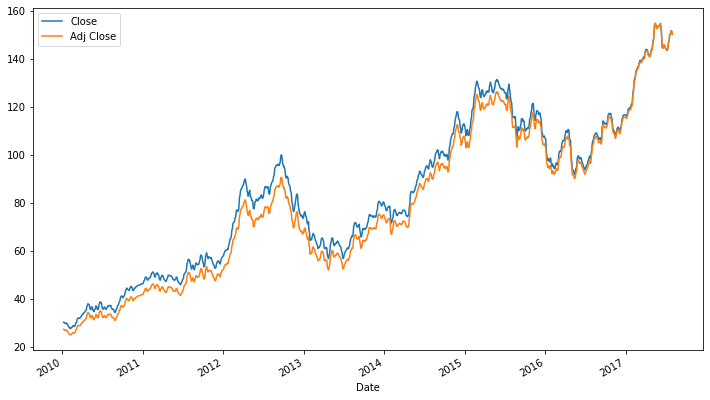

In [196]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

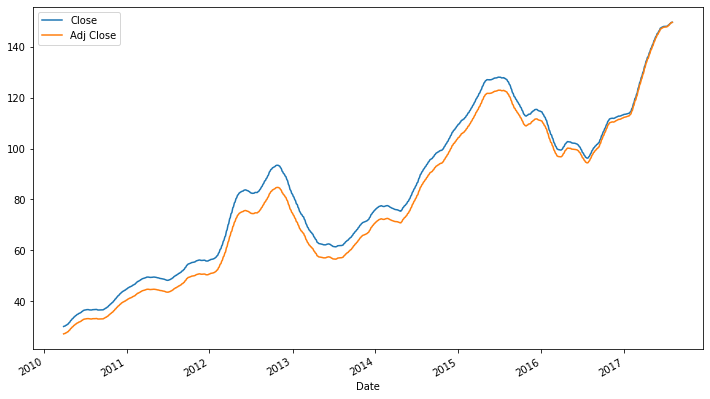

In [230]:
#Modification
aapl2.rolling(60)[['Close', 'Adj Close']].mean().plot();

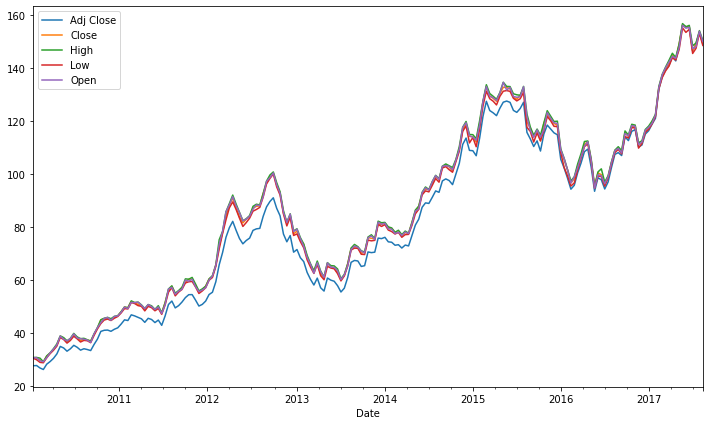

In [197]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

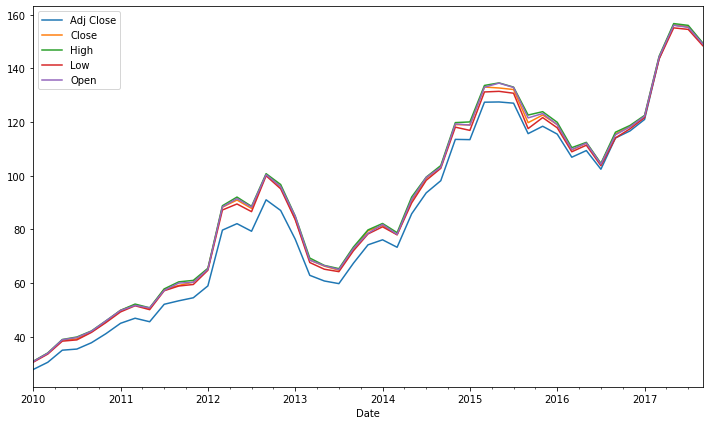

In [229]:
#Modification
aapl2.drop('Volume', axis=1).resample('2M').max().plot();

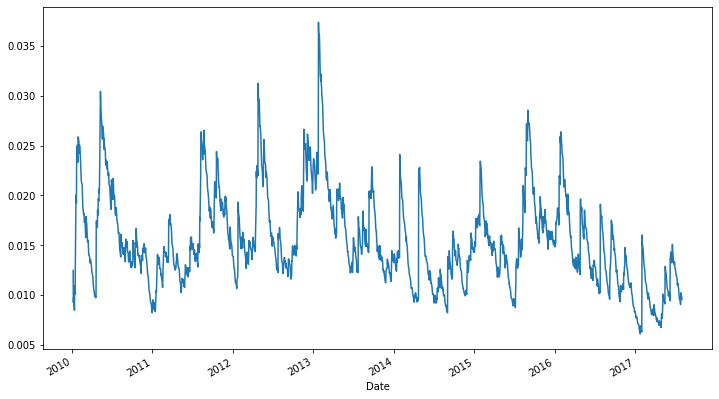

In [198]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

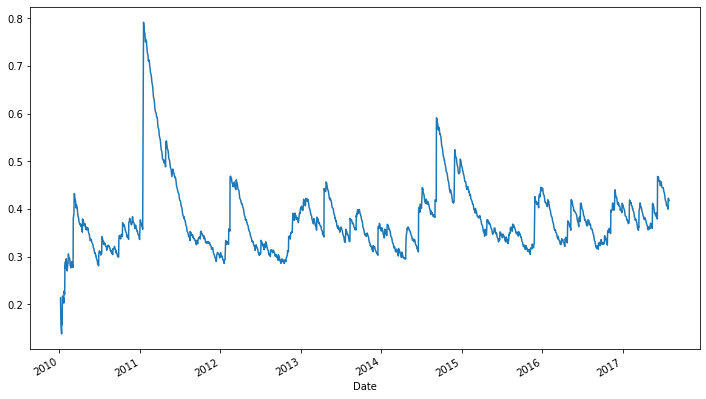

In [234]:
#Modification
aapl2['Volume'].pct_change().ewm(span=100).std().plot();

# "Real World" Data

In [235]:
#from demos.avocados import read_avocadata
def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

In [236]:
#from demos.avocados import read_avocadata
avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [242]:
#Modification
avocados2 = read_avocadata('2010', '2015')
avocados2.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [243]:
3# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

In [244]:
#Modification
avocados2.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

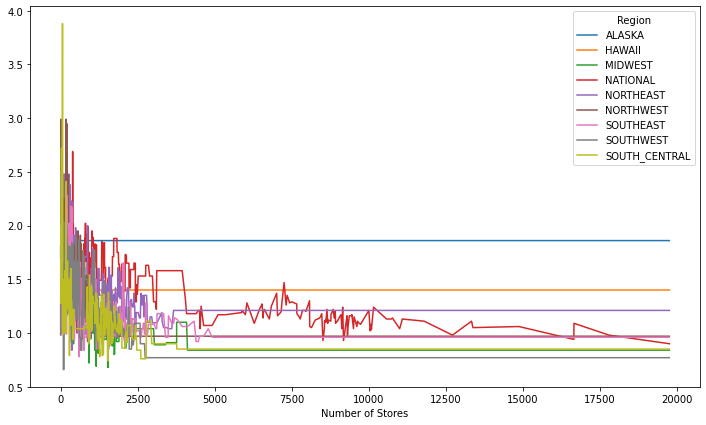

In [249]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

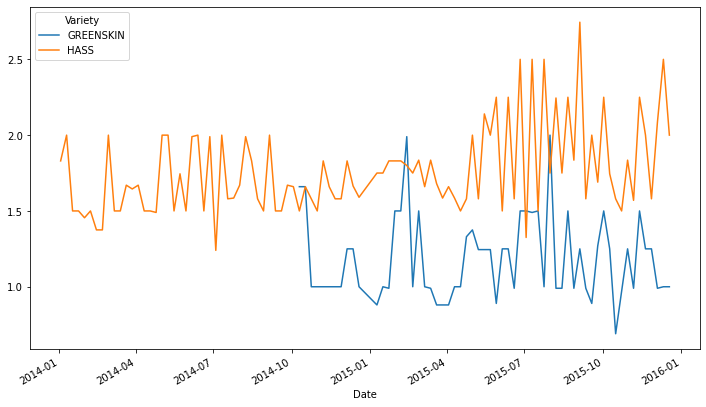

In [250]:
#Modification
hass2 = avocados[avocados.Region == 'MIDWEST']
hass2.groupby(['Date', 'Variety'])['High Price'].mean().unstack().ffill().plot();

In [256]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

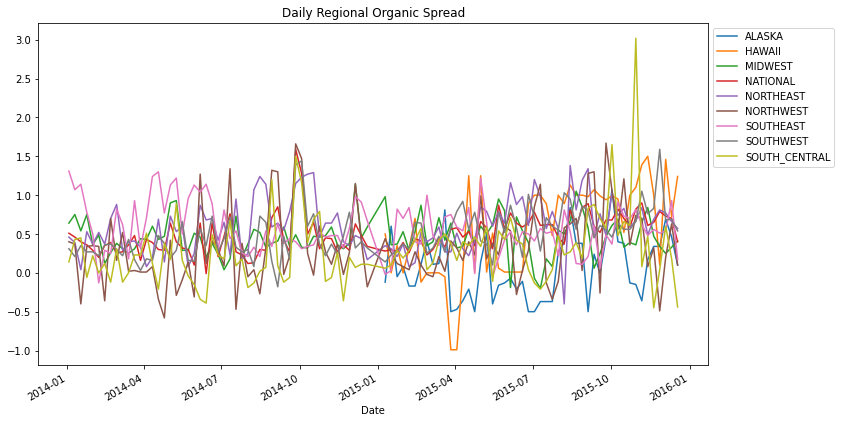

In [257]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

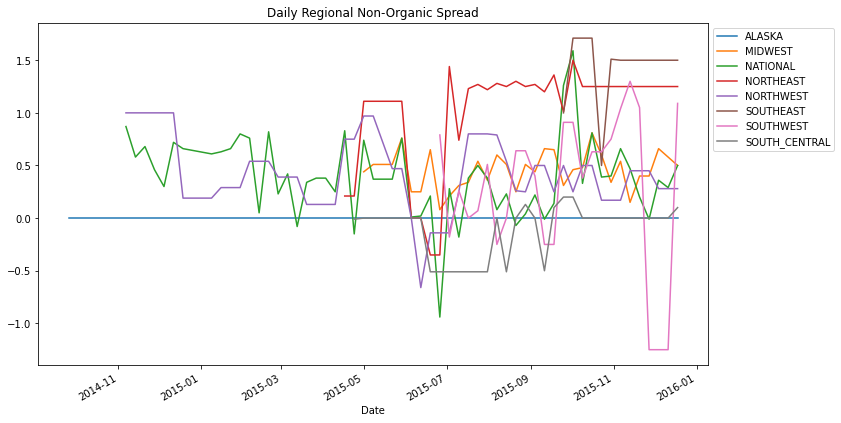

In [273]:
#Modification
organic_spread_by_region(avocados[avocados.Variety == 'GREENSKIN']).plot();
plt.gca().set_title("Daily Regional Non-Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [274]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


In [275]:
#Modification
spread_correlation2 = organic_spread_by_region(avocados[avocados.Variety == 'GREENSKIN']).corr()
spread_correlation2

Region,ALASKA,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,
ALASKA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIDWEST,NaN,1.000000,0.326341,0.307174,0.289433,0.041748,-0.346672,0.166863
NATIONAL,NaN,0.326341,1.000000,0.417789,0.299378,0.021097,0.250812,0.401773
NORTHEAST,NaN,0.307174,0.417789,1.000000,0.400814,0.434013,-0.149993,0.248797
NORTHWEST,NaN,0.289433,0.299378,0.400814,1.000000,0.257435,-0.111115,0.004146
SOUTHEAST,NaN,0.041748,0.021097,0.434013,0.257435,1.000000,-0.090884,-0.081374
SOUTHWEST,NaN,-0.346672,0.250812,-0.149993,-0.111115,-0.090884,1.000000,0.179237
SOUTH_CENTRAL,NaN,0.166863,0.401773,0.248797,0.004146,-0.081374,0.179237,1.000000


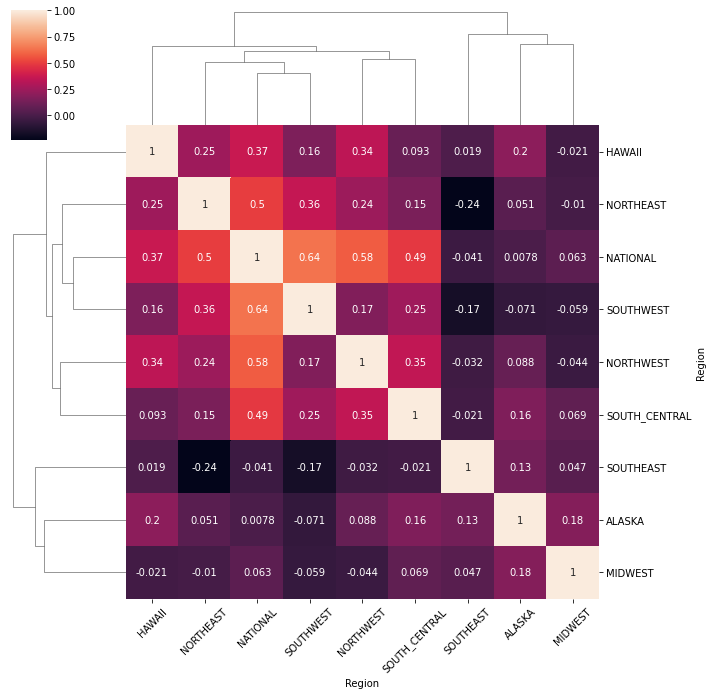

In [276]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!